### Analyze demographic data (Pandas)
1. Calculate age and filter the older population
2. Descriptive analysis of the patient demographic information

In [1]:
#import packages
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the patients CSV file
patients_df = pd.read_csv("patient_data/patients.csv")
patients_df.head()

,Id,BIRTHDATE,DEATHDATE,PREFIX,SUFFIX,MARITAL,RACE,ETHNICITY,GENDER,BIRTHPLACE,CITY,STATE,COUNTY,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE
0,f1639046-ecb1-b409-21d3-85a7e8e23c81,8/31/57,NaN,Ms.,NaN,S,white,nonhispanic,F,Germantown Maryland US,Baltimore,Maryland,Baltimore city,59484.51,1455.08
1,f851859f-b0fe-8b36-9939-4276b96d302d,11/22/50,NaN,Mrs.,NaN,M,black,nonhispanic,F,Clarksburg Maryland US,Baltimore,Maryland,Baltimore city,239428.05,12764.06
2,00e22b7e-70ae-e926-e0f6-4f3d8e30d019,10/24/53,7/12/19,Mr.,NaN,S,black,nonhispanic,M,Oxon Hill Maryland US,Downsville,Maryland,Washington County,1345863.62,3951.81
3,8dacd569-fbab-2604-de56-9859571ba52d,1/30/64,NaN,Mr.,NaN,M,asian,hispanic,M,Lima Lima Province PE,Olney,Maryland,Montgomery County,1387577.33,3711.51
4,fc488d45-11b9-52d3-3c81-14dbd5dbc7dc,10/24/39,NaN,Mrs.,NaN,M,white,nonhispanic,F,Ellicott City Maryland US,Baltimore,Maryland,Baltimore city,85562.87,4717.97


In [3]:
## Calculate age

# Convert birthdate column to datetime
patients_df['BIRTHDATE'] = pd.to_datetime(patients_df['BIRTHDATE'], format="%m/%d/%y")

# Identify patients with birth year in 20xx
current_year = datetime.now().year
year_20xx = patients_df['BIRTHDATE'].dt.year > current_year - 2000

# Subtract 100 years from birth year for patients born in 20xx
patients_df.loc[year_20xx, 'BIRTHDATE'] -= pd.offsets.DateOffset(years=100)

# Convert deathdate column to datetime
patients_df['DEATHDATE'] = pd.to_datetime(patients_df['DEATHDATE'], format="%m/%d/%y", errors='coerce')

# Filter out patients who are still alive
alive_mask = patients_df['DEATHDATE'].isnull()

# Calculate age based on birthdate and deathdate (if available)
patients_df.loc[~alive_mask, 'AGE'] = (patients_df.loc[~alive_mask, 'DEATHDATE'] - patients_df.loc[~alive_mask, 'BIRTHDATE']).astype('<m8[Y]')

# Calculate age based on birthdate only for alive patients
patients_df.loc[alive_mask, 'AGE'] = (pd.to_datetime('now') - patients_df.loc[alive_mask, 'BIRTHDATE']).astype('<m8[Y]')

# Print the first 5 rows of the dataframe with age calculated
patients_df.head()

,Id,BIRTHDATE,DEATHDATE,PREFIX,SUFFIX,MARITAL,RACE,ETHNICITY,GENDER,BIRTHPLACE,CITY,STATE,COUNTY,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE,AGE
0,f1639046-ecb1-b409-21d3-85a7e8e23c81,1957-08-31,NaT,Ms.,NaN,S,white,nonhispanic,F,Germantown Maryland US,Baltimore,Maryland,Baltimore city,59484.51,1455.08,65.0
1,f851859f-b0fe-8b36-9939-4276b96d302d,1950-11-22,NaT,Mrs.,NaN,M,black,nonhispanic,F,Clarksburg Maryland US,Baltimore,Maryland,Baltimore city,239428.05,12764.06,72.0
2,00e22b7e-70ae-e926-e0f6-4f3d8e30d019,1953-10-24,2019-07-12,Mr.,NaN,S,black,nonhispanic,M,Oxon Hill Maryland US,Downsville,Maryland,Washington County,1345863.62,3951.81,65.0
3,8dacd569-fbab-2604-de56-9859571ba52d,1964-01-30,NaT,Mr.,NaN,M,asian,hispanic,M,Lima Lima Province PE,Olney,Maryland,Montgomery County,1387577.33,3711.51,59.0
4,fc488d45-11b9-52d3-3c81-14dbd5dbc7dc,1939-10-24,NaT,Mrs.,NaN,M,white,nonhispanic,F,Ellicott City Maryland US,Baltimore,Maryland,Baltimore city,85562.87,4717.97,83.0


In [4]:
# Filter out patients who are not in the "older population"
older_population_df = patients_df[patients_df['AGE'] >= 65]
older_population_df.head()

,Id,BIRTHDATE,DEATHDATE,PREFIX,SUFFIX,MARITAL,RACE,ETHNICITY,GENDER,BIRTHPLACE,CITY,STATE,COUNTY,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE,AGE
0,f1639046-ecb1-b409-21d3-85a7e8e23c81,1957-08-31,NaT,Ms.,NaN,S,white,nonhispanic,F,Germantown Maryland US,Baltimore,Maryland,Baltimore city,59484.51,1455.08,65.0
1,f851859f-b0fe-8b36-9939-4276b96d302d,1950-11-22,NaT,Mrs.,NaN,M,black,nonhispanic,F,Clarksburg Maryland US,Baltimore,Maryland,Baltimore city,239428.05,12764.06,72.0
2,00e22b7e-70ae-e926-e0f6-4f3d8e30d019,1953-10-24,2019-07-12,Mr.,NaN,S,black,nonhispanic,M,Oxon Hill Maryland US,Downsville,Maryland,Washington County,1345863.62,3951.81,65.0
4,fc488d45-11b9-52d3-3c81-14dbd5dbc7dc,1939-10-24,NaT,Mrs.,NaN,M,white,nonhispanic,F,Ellicott City Maryland US,Baltimore,Maryland,Baltimore city,85562.87,4717.97,83.0
5,bc7d25d5-4bf2-2faa-92f3-e111fb97fbcf,1928-11-09,NaT,Ms.,NaN,S,white,hispanic,F,Roseau Saint George DM,Rockville,Maryland,Montgomery County,1429312.17,16704.24,94.0


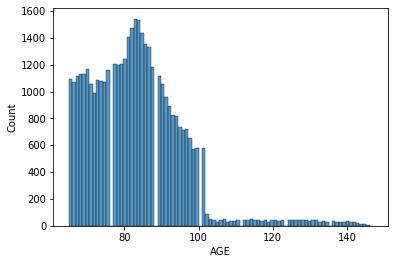

In [5]:
# Get the distribution of age
sns.histplot(data=older_population_df, x='AGE')
plt.show()

In [6]:
# Age larger than 120 can be outliers
pt_df = older_population_df[older_population_df['AGE'] <= 120]
pt_df.head()

,Id,BIRTHDATE,DEATHDATE,PREFIX,SUFFIX,MARITAL,RACE,ETHNICITY,GENDER,BIRTHPLACE,CITY,STATE,COUNTY,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE,AGE
0,f1639046-ecb1-b409-21d3-85a7e8e23c81,1957-08-31,NaT,Ms.,NaN,S,white,nonhispanic,F,Germantown Maryland US,Baltimore,Maryland,Baltimore city,59484.51,1455.08,65.0
1,f851859f-b0fe-8b36-9939-4276b96d302d,1950-11-22,NaT,Mrs.,NaN,M,black,nonhispanic,F,Clarksburg Maryland US,Baltimore,Maryland,Baltimore city,239428.05,12764.06,72.0
2,00e22b7e-70ae-e926-e0f6-4f3d8e30d019,1953-10-24,2019-07-12,Mr.,NaN,S,black,nonhispanic,M,Oxon Hill Maryland US,Downsville,Maryland,Washington County,1345863.62,3951.81,65.0
4,fc488d45-11b9-52d3-3c81-14dbd5dbc7dc,1939-10-24,NaT,Mrs.,NaN,M,white,nonhispanic,F,Ellicott City Maryland US,Baltimore,Maryland,Baltimore city,85562.87,4717.97,83.0
5,bc7d25d5-4bf2-2faa-92f3-e111fb97fbcf,1928-11-09,NaT,Ms.,NaN,S,white,hispanic,F,Roseau Saint George DM,Rockville,Maryland,Montgomery County,1429312.17,16704.24,94.0


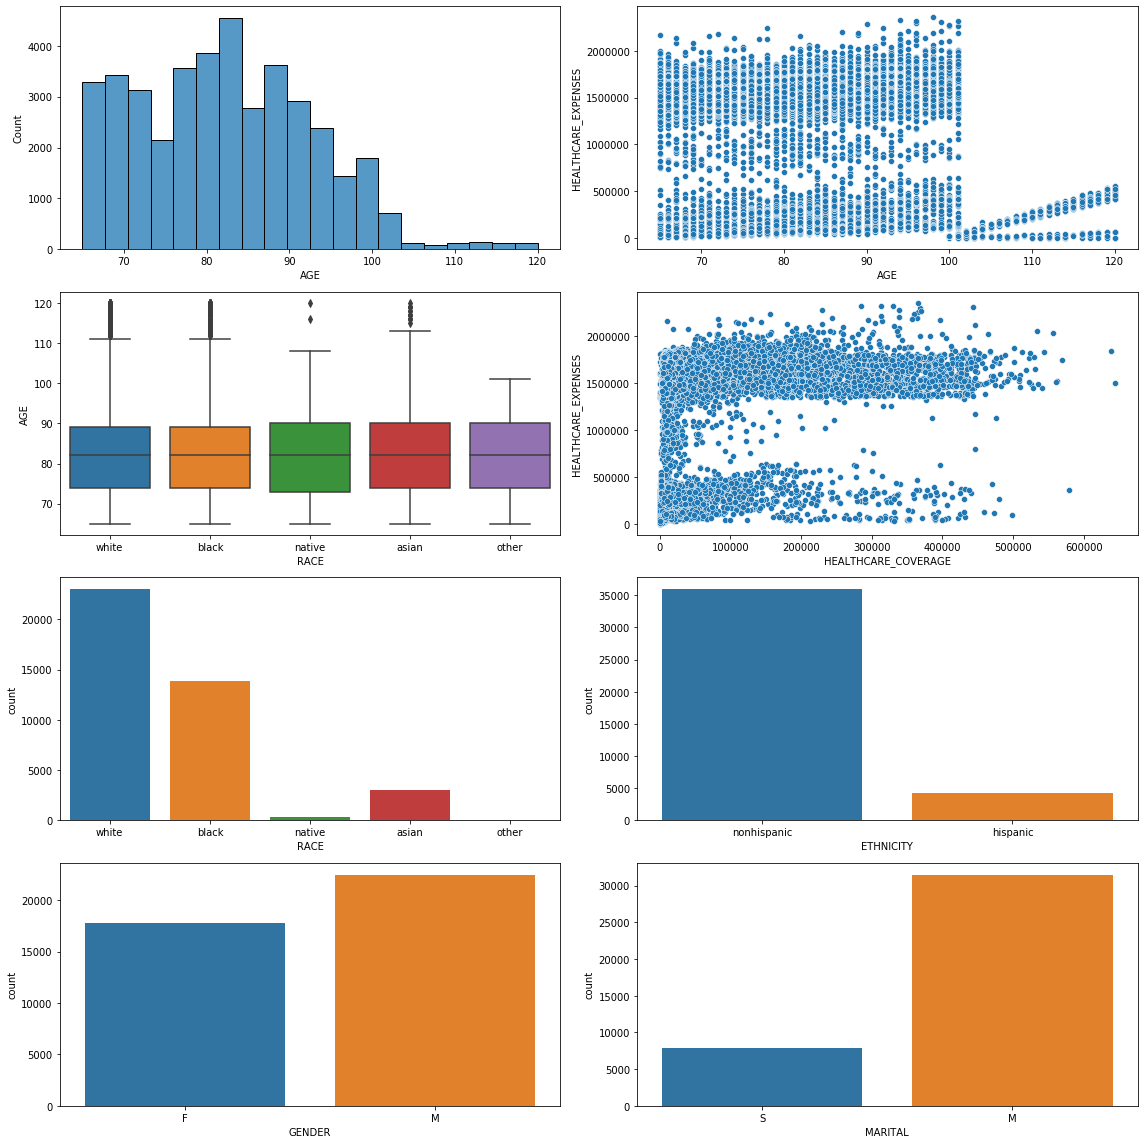

In [7]:
# Descriptive analysis
fig, axs = plt.subplots(4, 2, figsize=(16, 16))

sns.histplot(ax=axs[0, 0], data=pt_df, x='AGE', bins=20)
sns.scatterplot(ax=axs[0, 1], x='AGE', y='HEALTHCARE_EXPENSES', data=pt_df)

sns.boxplot(ax=axs[1, 0], x='RACE', y='AGE', data=pt_df)
sns.scatterplot(ax=axs[1, 1], x='HEALTHCARE_COVERAGE', y='HEALTHCARE_EXPENSES', data=pt_df)

sns.countplot(ax=axs[2, 0], data=pt_df, x='RACE')
sns.countplot(ax=axs[2, 1], data=pt_df, x='ETHNICITY')
sns.countplot(ax=axs[3, 0], data=pt_df, x='GENDER')
sns.countplot(ax=axs[3, 1], data=pt_df, x='MARITAL')

# Adjust the layout of the subplots
plt.tight_layout()
# Display the subplots
plt.show()

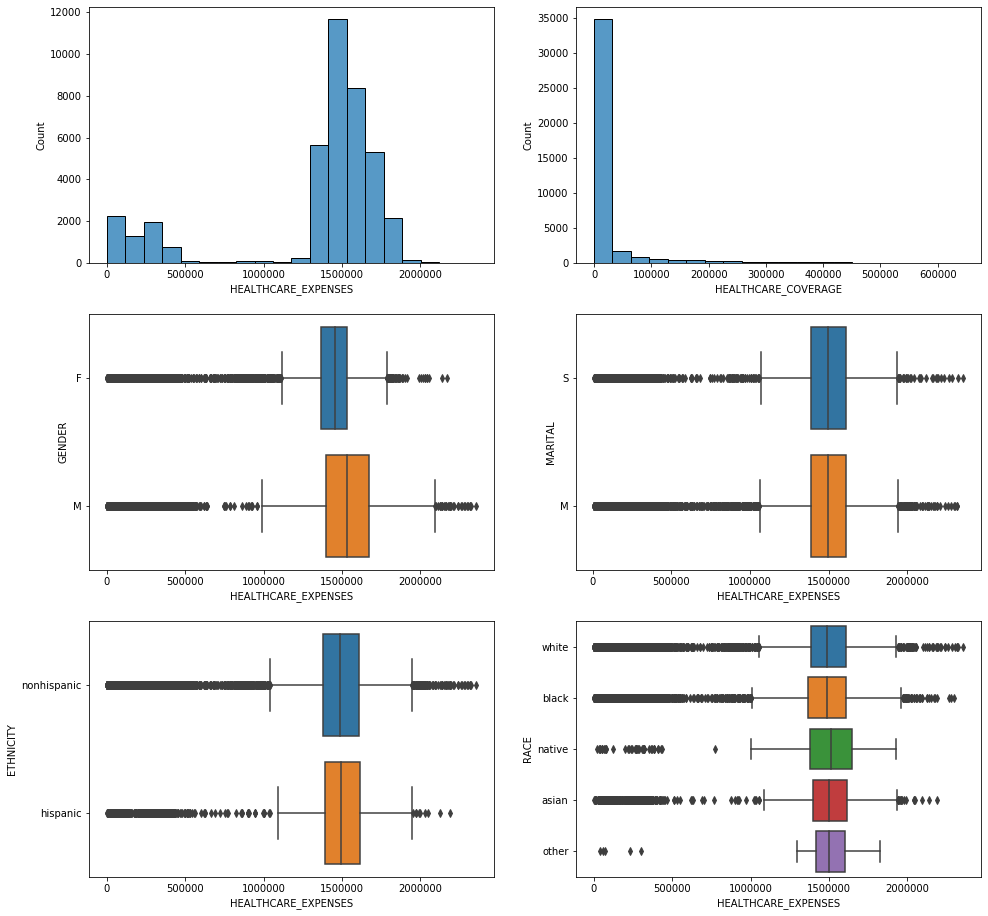

In [8]:
# Some additional analysis on HEALTHCARE_EXPENSES and HEALTHCARE_COVERAGE
fig, axs = plt.subplots(3, 2, figsize=(16, 16))

sns.histplot(ax=axs[0, 0], data=pt_df, x='HEALTHCARE_EXPENSES', bins=20)
sns.histplot(ax=axs[0, 1], data=pt_df, x='HEALTHCARE_COVERAGE', bins=20)

sns.boxplot(ax=axs[1, 0], x='HEALTHCARE_EXPENSES', y='GENDER', data=pt_df)
sns.boxplot(ax=axs[1, 1], x='HEALTHCARE_EXPENSES', y='MARITAL', data=pt_df)
sns.boxplot(ax=axs[2, 0], x='HEALTHCARE_EXPENSES', y='ETHNICITY', data=pt_df)
sns.boxplot(ax=axs[2, 1], x='HEALTHCARE_EXPENSES', y='RACE', data=pt_df)

In [9]:
# Only include necessary demographic information for future analysis
pt_df = pt_df[['Id', 'AGE', 'GENDER', 'RACE', 'ETHNICITY', 'HEALTHCARE_EXPENSES', 'HEALTHCARE_COVERAGE']]
pt_df

,Id,AGE,GENDER,RACE,ETHNICITY,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE
0,f1639046-ecb1-b409-21d3-85a7e8e23c81,65.0,F,white,nonhispanic,59484.51,1455.08
1,f851859f-b0fe-8b36-9939-4276b96d302d,72.0,F,black,nonhispanic,239428.05,12764.06
2,00e22b7e-70ae-e926-e0f6-4f3d8e30d019,65.0,M,black,nonhispanic,1345863.62,3951.81
4,fc488d45-11b9-52d3-3c81-14dbd5dbc7dc,83.0,F,white,nonhispanic,85562.87,4717.97
5,bc7d25d5-4bf2-2faa-92f3-e111fb97fbcf,94.0,F,white,hispanic,1429312.17,16704.24
...,...,...,...,...,...,...,...
53062,ed44e187-a16a-ad87-7162-ae328d195057,67.0,M,black,nonhispanic,1421186.53,3667.40
53063,88b9fe55-44a6-9237-75c8-4fcfec4a6f3d,77.0,M,black,nonhispanic,1605632.70,5007.60
53065,485b315b-d575-9653-4bf5-30df6080a677,68.0,M,black,nonhispanic,1344139.07,16129.24
53066,8e02420f-660a-f362-b25e-2852632fe78b,83.0,M,black,nonhispanic,1780466.80,6606.91


In [10]:
# Save as a new csv file
pt_df.to_csv('demo.csv')

### Further analysis on the encounter data (PySpark and Pandas)
1. Merge the patients data and filter to get necessary information
2. Data analysis based on AGE, ENCOUNTERCLASS,PAYER_COVERAGE, and REASONCODE

In [11]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import floor, countDistinct, when, col

spark = SparkSession.builder.getOrCreate()
sc = spark.sparkContext
sc

<SparkContext master=local[*] appName=PySparkShell>

In [12]:
# Read in demo.csv file
demo_df = spark.read.csv("demo.csv", header=True)

# Read in encounters.csv file
encounters_df = spark.read.csv("patient_data/encounters.csv", header=True)

# Filter out patients in demo.csv file
merged_df = encounters_df.join(demo_df, encounters_df.PATIENT == demo_df.Id, 'inner') \
                        .select(encounters_df.Id.alias('ENCOUNTER_ID'), 
                                demo_df.Id.alias('PATIENT_ID'), 
                                'AGE',
                                'GENDER',
                                'RACE',
                                'ETHNICITY',
                                'HEALTHCARE_EXPENSES', 
                                'HEALTHCARE_COVERAGE',
                                'ENCOUNTERCLASS', 
                                'BASE_ENCOUNTER_COST', 
                                'TOTAL_CLAIM_COST', 
                                'PAYER_COVERAGE', 
                                'REASONCODE', 
                                'REASONDESCRIPTION')

# Show merged dataframe
merged_df.show(5)

+--------------------+--------------------+----+------+-----+-----------+-------------------+-------------------+--------------+-------------------+----------------+--------------+----------+-----------------+
|        ENCOUNTER_ID|          PATIENT_ID| AGE|GENDER| RACE|  ETHNICITY|HEALTHCARE_EXPENSES|HEALTHCARE_COVERAGE|ENCOUNTERCLASS|BASE_ENCOUNTER_COST|TOTAL_CLAIM_COST|PAYER_COVERAGE|REASONCODE|REASONDESCRIPTION|
+--------------------+--------------------+----+------+-----+-----------+-------------------+-------------------+--------------+-------------------+----------------+--------------+----------+-----------------+
|ed3e50dd-ebdf-eae...|f851859f-b0fe-8b3...|72.0|     F|black|nonhispanic|          239428.05|           12764.06|      wellness|             116.48|          116.48|         56.48|      null|             null|
|47a338d3-4e76-fdf...|f1639046-ecb1-b40...|65.0|     F|white|nonhispanic|           59484.51|            1455.08|    ambulatory|             116.48|          11

In [13]:
# Convert columns to numerical
merged_df = merged_df.withColumn("AGE", merged_df["AGE"].cast("double"))
merged_df = merged_df.withColumn("HEALTHCARE_EXPENSES", merged_df["HEALTHCARE_EXPENSES"].cast("double"))
merged_df = merged_df.withColumn("HEALTHCARE_COVERAGE", merged_df["HEALTHCARE_COVERAGE"].cast("double"))
merged_df = merged_df.withColumn("BASE_ENCOUNTER_COST", merged_df["BASE_ENCOUNTER_COST"].cast("double"))
merged_df = merged_df.withColumn("TOTAL_CLAIM_COST", merged_df["TOTAL_CLAIM_COST"].cast("double"))
merged_df = merged_df.withColumn("PAYER_COVERAGE", merged_df["PAYER_COVERAGE"].cast("double"))

# Create age groups
merged_df = merged_df.withColumn("AGE_GROUP", floor(merged_df["AGE"]/10)*10)

In [14]:
# Count patients in each ENCOUNTERCLASS for different age groups
encounter_counts = merged_df.groupBy("AGE_GROUP", "ENCOUNTERCLASS").count().orderBy("AGE_GROUP", "ENCOUNTERCLASS")
encounter_counts.show()

+---------+--------------+------+
|AGE_GROUP|ENCOUNTERCLASS| count|
+---------+--------------+------+
|       60|    ambulatory|129222|
|       60|     emergency| 11984|
|       60|     inpatient| 32943|
|       60|    outpatient| 68601|
|       60|    urgentcare| 31380|
|       60|      wellness|143922|
|       70|    ambulatory|323885|
|       70|     emergency| 30692|
|       70|     inpatient| 66296|
|       70|    outpatient|162024|
|       70|    urgentcare| 81818|
|       70|      wellness|331467|
|       80|    ambulatory|568208|
|       80|     emergency| 54384|
|       80|     inpatient| 59454|
|       80|    outpatient|248472|
|       80|    urgentcare|134136|
|       80|      wellness|453650|
|       90|    ambulatory|362011|
|       90|     emergency| 46397|
+---------+--------------+------+
only showing top 20 rows



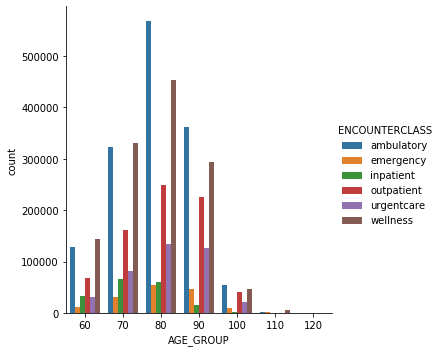

In [15]:
# Convert Spark DataFrame to Pandas DataFrame
encounter_counts_pd = encounter_counts.toPandas()

# Plot bar charts
sns.catplot(data=encounter_counts_pd, x='AGE_GROUP', y='count', hue='ENCOUNTERCLASS', kind='bar')
plt.show()

In [16]:
# Filter patients with REASONCODE not null
reasoncode_filtered_df = merged_df.filter(col("REASONCODE").isNotNull())

# Count patients in every ENCOUNTERCLASS
encounter_counts_reasoncode = reasoncode_filtered_df.groupBy("ENCOUNTERCLASS") \
    .agg(countDistinct("PATIENT_ID").alias("count"))

# Show the result
encounter_counts_reasoncode.show()

+--------------+-----+
|ENCOUNTERCLASS|count|
+--------------+-----+
|      wellness|19652|
|    outpatient| 3435|
|     emergency|14110|
|     inpatient|19707|
|    ambulatory|40006|
+--------------+-----+



In [17]:
# filter rows where PAYER_COVERAGE is 0
filtered_df = merged_df.filter(col("PAYER_COVERAGE") == 0)

# group by ENCOUNTERCLASS and count the number of patients
encounter_counts_nopayer = filtered_df.groupBy("ENCOUNTERCLASS") \
                              .count() \
                              .orderBy("count", ascending=False)

# show the result
encounter_counts_nopayer.show()

+--------------+------+
|ENCOUNTERCLASS| count|
+--------------+------+
|    outpatient|311776|
|    ambulatory|272107|
|      wellness| 76738|
|     inpatient| 29564|
|    urgentcare| 17429|
|     emergency| 10710|
+--------------+------+



### Merge the conditions data for final analyze (PySpark and Pandas)
1. Merge the conditions file to the merged dataframe and save it as a csv file
2. Read this file as the final data for further analyze

In [18]:
# read the conditions.csv file into a PySpark DataFrame
conditions_df = spark.read.csv("patient_data/conditions.csv", header=True)

# join the conditions_df with merged_df using the PATIENT and ENCOUNTER columns
merged_conditions_df = merged_df.join(
    conditions_df.select("PATIENT", "ENCOUNTER", "CODE", "DESCRIPTION"), 
    (col("ENCOUNTER") == col("ENCOUNTER_ID")) & (col("PATIENT") == col("PATIENT_ID")), 
    "inner"
)

# drop the redundant columns
merged_conditions_df = merged_conditions_df.drop("PATIENT", "ENCOUNTER")
merged_conditions_df.show(5)

+--------------------+--------------------+----+------+-----+-----------+-------------------+-------------------+--------------+-------------------+----------------+--------------+----------+-----------------+---------+---------+--------------------+
|        ENCOUNTER_ID|          PATIENT_ID| AGE|GENDER| RACE|  ETHNICITY|HEALTHCARE_EXPENSES|HEALTHCARE_COVERAGE|ENCOUNTERCLASS|BASE_ENCOUNTER_COST|TOTAL_CLAIM_COST|PAYER_COVERAGE|REASONCODE|REASONDESCRIPTION|AGE_GROUP|     CODE|         DESCRIPTION|
+--------------------+--------------------+----+------+-----+-----------+-------------------+-------------------+--------------+-------------------+----------------+--------------+----------+-----------------+---------+---------+--------------------+
|000220e6-011a-d2b...|000d6dd7-4641-20f...|88.0|     M|white|nonhispanic|         1413885.04|           16800.37|     inpatient|             116.48|          116.48|         76.48| 840539006|         COVID-19|       80|233604007|Pneumonia (disorde

In [19]:
# Save the merged dataframe as a csv file
merged_conditions_df.coalesce(1).write.format('csv').option('header',True).mode('overwrite').save('merged_conditions.csv')

In [20]:
data = pd.read_csv("merged_conditions.csv")
data.head()

,ENCOUNTER_ID,PATIENT_ID,AGE,GENDER,RACE,ETHNICITY,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE,ENCOUNTERCLASS,BASE_ENCOUNTER_COST,TOTAL_CLAIM_COST,PAYER_COVERAGE,REASONCODE,REASONDESCRIPTION,AGE_GROUP,CODE,DESCRIPTION
0,000220e6-011a-d2ba-12fd-c4271286255c,000d6dd7-4641-20f3-4102-e5b513dba2ee,88.0,M,white,nonhispanic,1413885.04,16800.37,inpatient,116.48,116.48,76.48,840539006.0,COVID-19,80,233604007,Pneumonia (disorder)
1,000220e6-011a-d2ba-12fd-c4271286255c,000d6dd7-4641-20f3-4102-e5b513dba2ee,88.0,M,white,nonhispanic,1413885.04,16800.37,inpatient,116.48,116.48,76.48,840539006.0,COVID-19,80,389087006,Hypoxemia (disorder)
2,000220e6-011a-d2ba-12fd-c4271286255c,000d6dd7-4641-20f3-4102-e5b513dba2ee,88.0,M,white,nonhispanic,1413885.04,16800.37,inpatient,116.48,116.48,76.48,840539006.0,COVID-19,80,271825005,Respiratory distress (finding)
3,000220e6-011a-d2ba-12fd-c4271286255c,000d6dd7-4641-20f3-4102-e5b513dba2ee,88.0,M,white,nonhispanic,1413885.04,16800.37,inpatient,116.48,116.48,76.48,840539006.0,COVID-19,80,65710008,Acute respiratory failure (disorder)
4,000220e6-011a-d2ba-12fd-c4271286255c,000d6dd7-4641-20f3-4102-e5b513dba2ee,88.0,M,white,nonhispanic,1413885.04,16800.37,inpatient,116.48,116.48,76.48,840539006.0,COVID-19,80,770349000,Sepsis caused by virus (disorder)


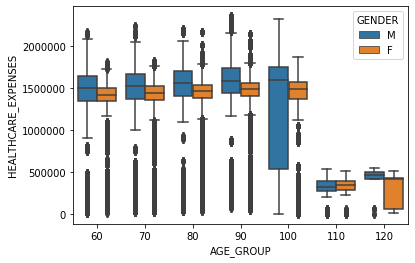

In [21]:
# The distribution of healthcare expenses for different age groups and genders
sns.boxplot(x="AGE_GROUP", y="HEALTHCARE_EXPENSES", hue="GENDER", data=data)

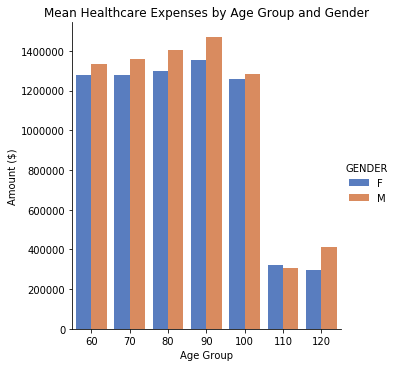

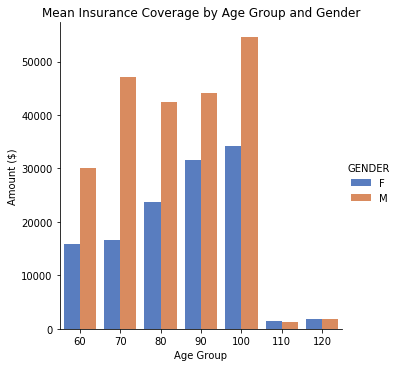

In [22]:
# Compute the mean healthcare expenses and insurance coverage by age group and gender
expenses_coverage_age_gender = data.groupby(['AGE_GROUP', 'GENDER']).agg({'HEALTHCARE_EXPENSES': 'mean', 'HEALTHCARE_COVERAGE': 'mean'}).reset_index()

# Plot the results
sns.catplot(x='AGE_GROUP', y='HEALTHCARE_EXPENSES', hue='GENDER', data=expenses_coverage_age_gender, kind='bar', palette='muted')
plt.xlabel('Age Group')
plt.ylabel('Amount ($)')
plt.title('Mean Healthcare Expenses by Age Group and Gender')
plt.show()

sns.catplot(x='AGE_GROUP', y='HEALTHCARE_COVERAGE', hue='GENDER', data=expenses_coverage_age_gender, kind='bar', palette='muted')
plt.xlabel('Age Group')
plt.ylabel('Amount ($)')
plt.title('Mean Insurance Coverage by Age Group and Gender')
plt.show()

          CODE                              DESCRIPTION  COUNT
194  444814009               Viral sinusitis (disorder)  45203
104  195662009       Acute viral pharyngitis (disorder)  24807
99   162864005  Body mass index 30+ - obesity (finding)  24095
206  840544004                       Suspected COVID-19  22116
205  840539006                                 COVID-19  21672
8     15777000                              Prediabetes  21555
4     10509002              Acute bronchitis (disorder)  20385
166  386661006                          Fever (finding)  19811
143  271737000                        Anemia (disorder)  19716
38    49727002                          Cough (finding)  15055


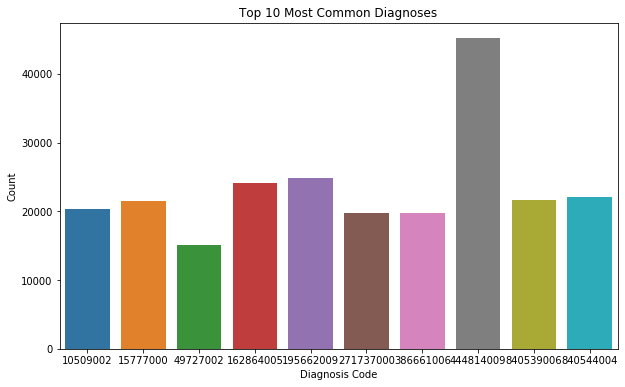

In [23]:
# Top 10 most common diagnoses
diagnoses = data.groupby(['CODE', 'DESCRIPTION']).size().reset_index(name='COUNT')
top_10_diagnoses = diagnoses.sort_values(by='COUNT', ascending=False).head(10)
print(top_10_diagnoses)

# Plot of the most common diagnoses
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_diagnoses, x='CODE', y='COUNT')
plt.title('Top 10 Most Common Diagnoses')
plt.xlabel('Diagnosis Code')
plt.ylabel('Count')
plt.show()

In [24]:
avg_healthcare_expenses = np.mean(data['HEALTHCARE_EXPENSES'])
avg_healthcare_coverage = np.mean(data['HEALTHCARE_COVERAGE'])

print(f"Average Healthcare Expenses per Patient: ${avg_healthcare_expenses:,.2f}")
print(f"Average Healthcare Coverage per Patient: ${avg_healthcare_coverage:,.2f}")

num_patients_coverage = len(data[data['PAYER_COVERAGE'] > 0])
num_patients_no_coverage = len(data[data['PAYER_COVERAGE'] == 0])

coverage_pct = num_patients_coverage / len(data) * 100
no_coverage_pct = num_patients_no_coverage / len(data) * 100

print(f"Percentage of Patients with Insurance Coverage: {coverage_pct:.2f}%")
print(f"Percentage of Patients without Insurance Coverage: {no_coverage_pct:.2f}%")

total_encounter_costs = np.sum(data['TOTAL_CLAIM_COST'])
avg_encounter_costs = np.mean(data['TOTAL_CLAIM_COST'])

print(f"Total Encounter Costs: ${total_encounter_costs:,.2f}")
print(f"Average Encounter Cost per Patient: ${avg_encounter_costs:,.2f}")

Average Healthcare Expenses per Patient: $1,346,491.15
Average Healthcare Coverage per Patient: $33,987.27
Percentage of Patients with Insurance Coverage: 83.29%
Percentage of Patients without Insurance Coverage: 16.71%
Total Encounter Costs: $56,936,981.94
Average Encounter Cost per Patient: $90.66


In [25]:
# Calculate number of patients without insurance coverage in each encounter class
no_coverage = data[data['PAYER_COVERAGE'] == 0].groupby('ENCOUNTERCLASS')['PATIENT_ID'].nunique().reset_index()
no_coverage.rename(columns={'PATIENT_ID': 'no_coverage_patients'}, inplace=True)

# Calculate total number of patients in each encounter class
total_patients = data.groupby('ENCOUNTERCLASS')['PATIENT_ID'].nunique().reset_index()
total_patients.rename(columns={'PATIENT_ID': 'total_patients'}, inplace=True)

# Merge dataframes and calculate percentage of patients without insurance coverage
encounter_coverage = pd.merge(total_patients, no_coverage, on='ENCOUNTERCLASS', how='outer')
encounter_coverage['coverage_percentage'] = (encounter_coverage['no_coverage_patients'] / encounter_coverage['total_patients']) * 100

# Order by percentage of patients without insurance coverage
encounter_coverage.sort_values('coverage_percentage', ascending=False, inplace=True)
encounter_coverage

,ENCOUNTERCLASS,total_patients,no_coverage_patients,coverage_percentage
0,ambulatory,39902,21673,54.315573
3,outpatient,16398,7598,46.334919
2,inpatient,15388,6581,42.767091
1,emergency,31345,4640,14.802999
5,wellness,38650,2590,6.701164
4,urgentcare,1151,73,6.342311


In [26]:
# For age group
no_coverage_age = data[data['PAYER_COVERAGE'] == 0].groupby(['AGE_GROUP', 'ENCOUNTERCLASS'])['PATIENT_ID'].nunique().reset_index()
no_coverage_age.rename(columns={'PATIENT_ID': 'no_coverage_patients'}, inplace=True)
total_patients_age = data.groupby(['AGE_GROUP', 'ENCOUNTERCLASS'])['PATIENT_ID'].nunique().reset_index()
total_patients_age.rename(columns={'PATIENT_ID': 'total_patients'}, inplace=True)
encounter_coverage_age = pd.merge(total_patients_age, no_coverage_age, on=['AGE_GROUP', 'ENCOUNTERCLASS'], how='outer')
encounter_coverage_age['coverage_percentage'] = (encounter_coverage_age['no_coverage_patients'] / encounter_coverage_age['total_patients']) * 100
encounter_coverage_age.sort_values(['AGE_GROUP', 'coverage_percentage'], ascending=[True, False], inplace=True)
encounter_coverage_age

,AGE_GROUP,ENCOUNTERCLASS,total_patients,no_coverage_patients,coverage_percentage
3,60,outpatient,2097,1776.0,84.692418
0,60,ambulatory,5511,3843.0,69.733261
2,60,inpatient,1745,770.0,44.126074
1,60,emergency,3791,884.0,23.318386
4,60,urgentcare,66,14.0,21.212121
5,60,wellness,5314,336.0,6.322921
6,70,ambulatory,11157,6436.0,57.685758
9,70,outpatient,4561,2297.0,50.361763
8,70,inpatient,4077,1734.0,42.531273
7,70,emergency,8470,1260.0,14.876033


In [27]:
# For race
no_coverage_race = data[data['PAYER_COVERAGE'] == 0].groupby(['RACE', 'ENCOUNTERCLASS'])['PATIENT_ID'].nunique().reset_index()
no_coverage_race.rename(columns={'PATIENT_ID': 'no_coverage_patients'}, inplace=True)
total_patients_race = data.groupby(['RACE', 'ENCOUNTERCLASS'])['PATIENT_ID'].nunique().reset_index()
total_patients_race.rename(columns={'PATIENT_ID': 'total_patients'}, inplace=True)
encounter_coverage_race = pd.merge(total_patients_race, no_coverage_race, on=['RACE', 'ENCOUNTERCLASS'], how='outer')
encounter_coverage_race['coverage_percentage'] = (encounter_coverage_race['no_coverage_patients'] / encounter_coverage_race['total_patients']) * 100
encounter_coverage_race.sort_values(['RACE', 'coverage_percentage'], ascending=[True, False], inplace=True)
encounter_coverage_race

,RACE,ENCOUNTERCLASS,total_patients,no_coverage_patients,coverage_percentage
0,asian,ambulatory,3010,1590.0,52.823920
3,asian,outpatient,1283,611.0,47.622759
2,asian,inpatient,1150,442.0,38.434783
1,asian,emergency,2375,307.0,12.926316
4,asian,urgentcare,100,6.0,6.000000
5,asian,wellness,2924,141.0,4.822161
6,black,ambulatory,13724,7600.0,55.377441
9,black,outpatient,5773,2810.0,48.674866
8,black,inpatient,5242,2217.0,42.293018
7,black,emergency,10796,1624.0,15.042608


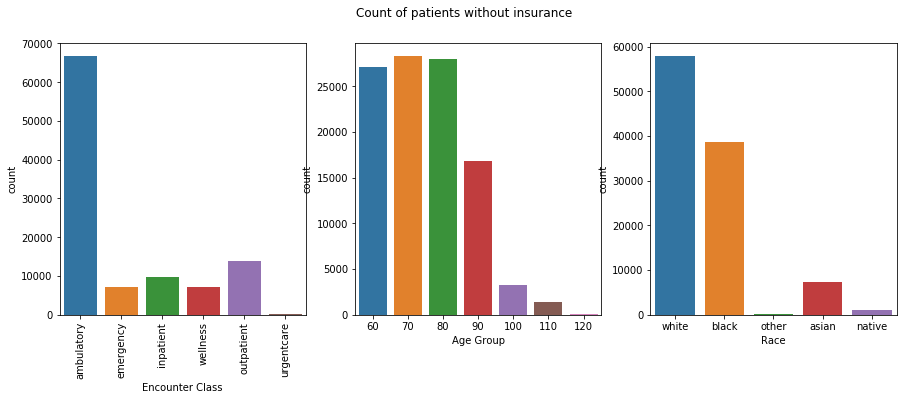

In [28]:
# Count of patients without insurance
# set up the subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# plot 1: count of patients without insurance by ENCOUNTERCLASS
sns.countplot(x='ENCOUNTERCLASS', data=data[data['PAYER_COVERAGE'] == 0], ax=axs[0])
axs[0].set_xlabel('Encounter Class')
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=90)

# plot 2: count of patients without insurance by AGE_GROUP
sns.countplot(x='AGE_GROUP', data=data[data['PAYER_COVERAGE'] == 0], ax=axs[1])
axs[1].set_xlabel('Age Group')

# plot 3: count of patients without insurance by RACE
sns.countplot(x='RACE', data=data[data['PAYER_COVERAGE'] == 0], ax=axs[2])
axs[2].set_xlabel('Race')

# set the title for the figure
fig.suptitle('Count of patients without insurance')

# display the plot
plt.show()

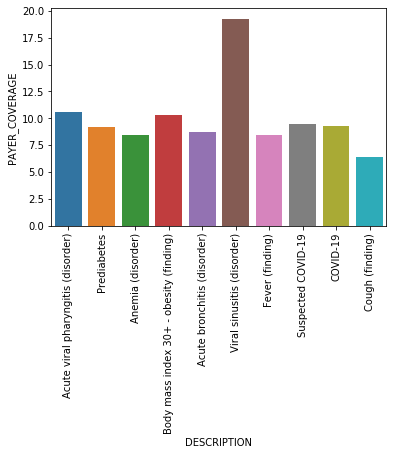

In [29]:
top_10_diagnosis = data["DESCRIPTION"].value_counts().head(10).index.tolist()
top_10_df = data[data["DESCRIPTION"].isin(top_10_diagnosis)]

# Percentage of patients with insurance
sns.barplot(x="DESCRIPTION", y="PAYER_COVERAGE", data=top_10_df, estimator=lambda x: len(x) / len(top_10_df) * 100)
plt.xticks(rotation=90)
plt.show()

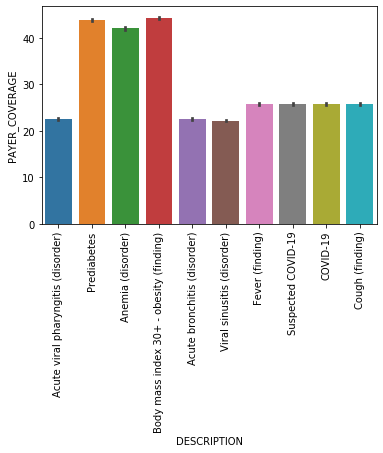

In [30]:
# Percentage of money insurance covered in average
sns.barplot(x="DESCRIPTION", y="PAYER_COVERAGE", data=top_10_df, estimator="mean")
plt.xticks(rotation=90)
plt.show()

In [31]:
top_10_expensive_diagnoses = data.groupby('DESCRIPTION')['TOTAL_CLAIM_COST'].sum().sort_values(ascending=False).head(10)
top_10_expensive_diagnoses

DESCRIPTION
Viral sinusitis (disorder)                 3.159238e+06
Body mass index 30+ - obesity (finding)    2.743363e+06
Prediabetes                                2.427470e+06
Anemia (disorder)                          2.166860e+06
Acute viral pharyngitis (disorder)         1.733761e+06
Hyperlipidemia                             1.583199e+06
Suspected COVID-19                         1.545687e+06
COVID-19                                   1.515122e+06
Hypertension                               1.498540e+06
Acute bronchitis (disorder)                1.424708e+06
Name: TOTAL_CLAIM_COST, dtype: float64

In [32]:
average_healthcare_expenses_by_diagnosis = data.groupby('DESCRIPTION')['HEALTHCARE_EXPENSES'].mean().sort_values(ascending=False)
average_healthcare_expenses_by_diagnosis.head(10)

DESCRIPTION
Attempted suicide - suffocation                           1.668495e+06
Retention of urine (disorder)                             1.603022e+06
Proteinuria due to type 2 diabetes mellitus (disorder)    1.586322e+06
Chronic kidney disease stage 3 (disorder)                 1.586322e+06
History of upper limb amputation (situation)              1.565087e+06
History of disarticulation at wrist (situation)           1.548357e+06
Spina bifida occulta (disorder)                           1.521149e+06
Dystonia (disorder)                                       1.506784e+06
Asthma                                                    1.501522e+06
Epilepsy (disorder)                                       1.468640e+06
Name: HEALTHCARE_EXPENSES, dtype: float64